In [21]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

In [12]:
data = torchvision.datasets.StanfordCars(root=".", split="test")
dataloader = DataLoader(data, shuffle=True, batch_size=16)

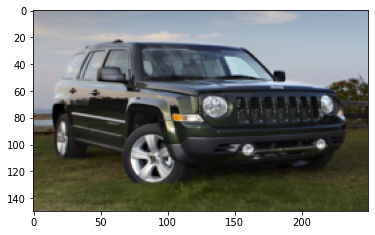

In [64]:
img, _ = data[2]
to_tensor = transforms.Compose([transforms.Resize((150, 250)), transforms.ToTensor()])
img_tensor = to_tensor(img)
plt.imshow(img_tensor.permute(1,2,0))
plt.show()


In [41]:
def diffuse(img, beta):
  # noise = torch.normal(0, 1, img.shape)
  # return torch.sqrt(1 - beta) * img + beta * noise
  return torch.normal(torch.sqrt(1 - beta) * img, torch.sqrt(beta))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


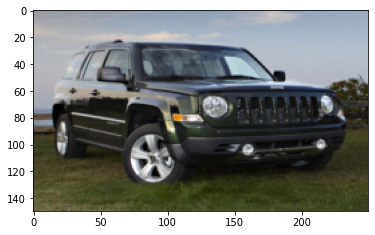

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


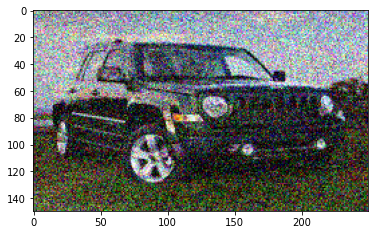

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


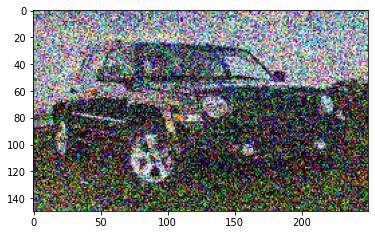

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


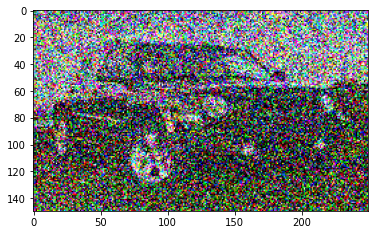

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


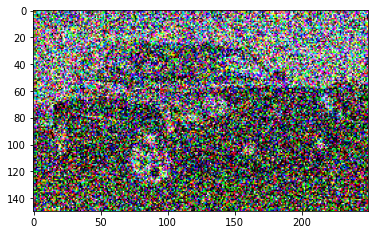

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


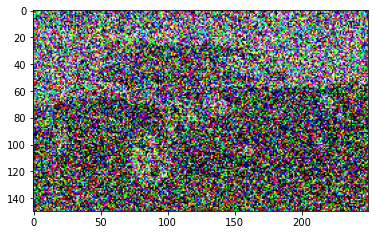

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


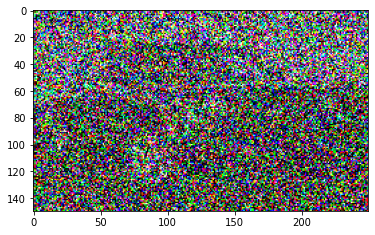

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


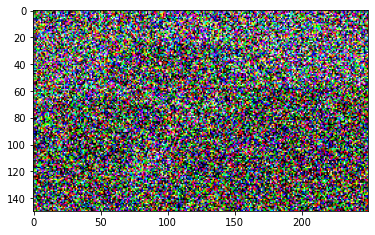

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


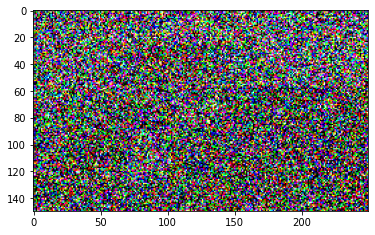

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


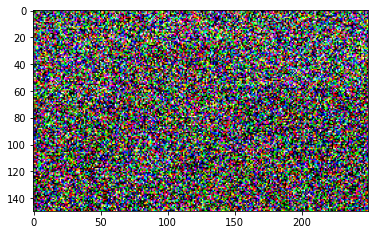

In [61]:
beta_list = torch.linspace(0.0001, 0.02, 300)

for i, beta in enumerate(beta_list):
  img_tensor = diffuse(img_tensor, beta)
  if i % 30 == 0:
    plt.imshow(img_tensor.permute(1,2,0))
    plt.show()

In [52]:
alphas = 1 - beta_list
alpha_cumprod = torch.cumprod(alphas[:-1], 0)
def diffuse_t(x, t):
  noise = torch.normal(0, 1, x.shape)
  return torch.sqrt(alpha_cumprod[t]) * x + noise * torch.sqrt(1 - alpha_cumprod[t])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


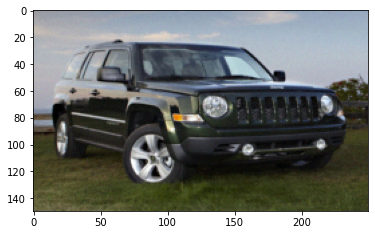

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


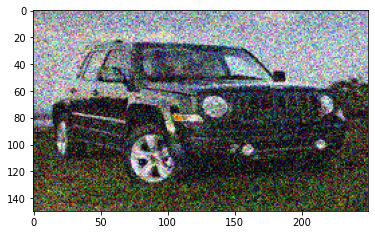

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


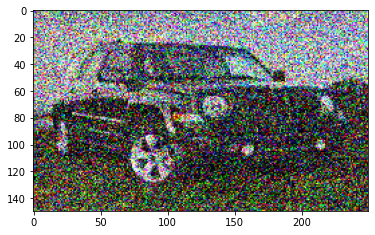

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


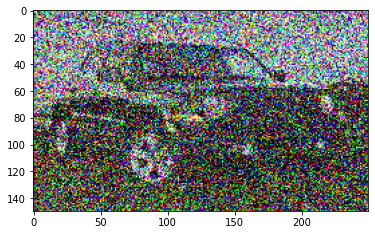

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


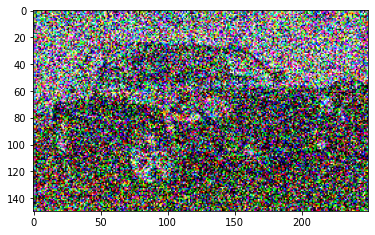

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


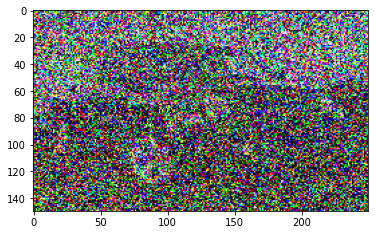

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


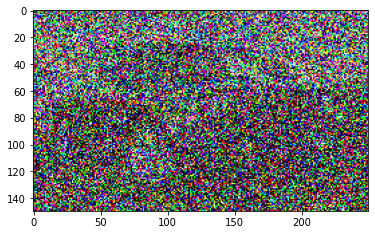

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


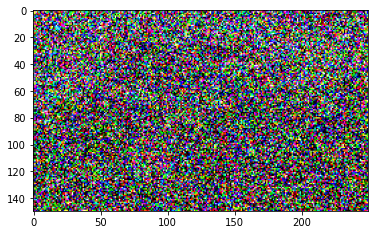

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


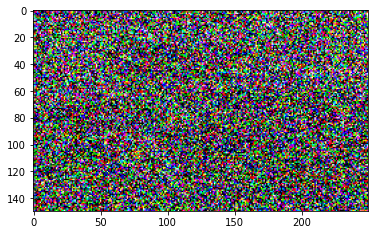

In [65]:
for t in range(0, 300, 30):
  img_tensor2 = diffuse_t(img_tensor, t)
  plt.imshow(img_tensor2.permute(1,2,0))
  plt.show()